In [ ]:
import matplotlib.pyplot as plt   #helps in interactive visualisation
import numpy as np                #working with arrays    
import pandas as pd               #helps in data manipulation in python 

import os                         #provides function for operating with operating system        

import seaborn as sns             #data visualisation based on matplotlib, provides high-level interface

import keras                      #acts as inteface for tensorflow library, provides interface for ANN

from glob import glob             #returns all file paths that match a specific pattern

from PIL import Image             #used to adjust pixel for the image etc, inshort image editing features

from google.colab import drive                              #Mount drive

from sklearn.model_selection import train_test_split        #split the the dataset into training and testing set

from keras.utils.np_utils import to_categorical             #Converts a class vector (integers) to binary class matrix

from keras.models import Sequential                         #Create models layer-by-layer in a step-by-step function

from keras.layers.convolutional import Conv2D               #

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AveragePooling2D, Activation     

from keras.callbacks import ReduceLROnPlateau, EarlyStopping                            #Turning down the learning rate reduces the random fluctuations in the errors 
                                                                         #due to the different gradients on different mini-batches.    
from tensorflow.keras.layers import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator                #applies changes in images in real-time while model
                                                                        # is still training. You can apply any random transformations on 
                                                                        # each training image as it is passed to the model. This will not 
                                                                        # only make your model robust but will also save up on the overhead memory

from tensorflow.keras.optimizers import Adam                    

from imblearn.over_sampling import RandomOverSampler 

import tensorflow as tf



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/HAM10000_ZIPPED.zip > /dev/null

In [ ]:
#change of var name -> 2

skin_dir = '/content/drive/MyDrive'
img_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(skin_dir,'*', '*.jpg'))}
#print(img_path_dict)

We created a dictionary for abbreviated labels for the diseases

In [ ]:
#change of var name -> 1
#Dict created for proper matching abbrv. with the dataset

lesion_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

lesion_class_dict = {
    0 : 'nv',
    1 : 'mel',
    2 : 'bkl',
    3 : 'bcc',
    4 : 'akiec',
    5 : 'vasc',
    6 : 'df',
    
}


test_batches = {
    'nv' : 0,
    'mel' : 1,
    'bkl' : 2, 
    'bcc' : 3,
    'akiec' : 4,
    'vasc' : 5,
    'df' : 6,
    
}

Added columns for better readability

In [ ]:
skin_df = pd.read_csv('/content/drive/MyDrive/HAM10000_metadata.csv')

# Creating New Columns for better readability

skin_df['Path'] = skin_df['image_id'].map(img_path_dict.get)                  #corresponding values are added in the dataset using map function 
skin_df['cell_type'] = skin_df['dx'].map(lesion_dict.get) 
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

In [ ]:
a = skin_df['dx_type'].value_counts()

print(type(a))
a.to_dict()

print(type(a))
a

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64

In [ ]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,Path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/HAM10000_images_part_1/...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/HAM10000_images_part_1/...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/HAM10000_images_part_1/...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/HAM10000_images_part_1/...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/drive/MyDrive/HAM10000_images_part_2/...,Benign keratosis-like lesions,2


In [ ]:
skin_df['Path'][2]

'/content/drive/MyDrive/HAM10000_images_part_1/ISIC_0026769.jpg'

In [ ]:
skin_df['dx_type'].unique()

array(['histo', 'consensus', 'confocal', 'follow_up'], dtype=object)

In [ ]:
print(skin_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lesion_id      10015 non-null  object 
 1   image_id       10015 non-null  object 
 2   dx             10015 non-null  object 
 3   dx_type        10015 non-null  object 
 4   age            9958 non-null   float64
 5   sex            10015 non-null  object 
 6   localization   10015 non-null  object 
 7   Path           10015 non-null  object 
 8   cell_type      10015 non-null  object 
 9   cell_type_idx  10015 non-null  int8   
dtypes: float64(1), int8(1), object(8)
memory usage: 714.1+ KB
None


In [ ]:
skin_df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
Path              0
cell_type         0
cell_type_idx     0
dtype: int64

In [ ]:
#Since only 'age' attribute has null values with a count of 57
#Filling it with their mean

skin_df['age'].fillna((skin_df['age'].mean()), inplace = True)

In [ ]:
skin_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
Path             0
cell_type        0
cell_type_idx    0
dtype: int64

# **EDA**
The following is the EDA section where we analyse the data of the datset for further processin and information gathering.

1. In the first graph we show the cell type counts for the different diseases.

In [ ]:
skin_df['cell_type'].value_counts()

Melanocytic nevi                  6705
Melanoma                          1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: cell_type, dtype: int64

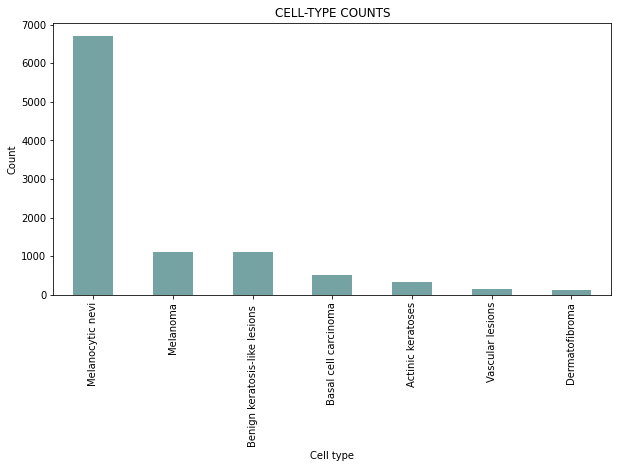

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
skin_df['cell_type'].value_counts().plot(kind='bar', ax=ax1, color = (0.1, 0.4, 0.4, 0.6))
plt.title('CELL-TYPE COUNTS')
plt.xlabel('Cell type')
plt.ylabel('Count')
#addlabels(x, y)
plt.show()



*   #### According to this graph, Melanocytic nevi is majority in number in the given dataset 
* #### Melanoma type of cell has second highest count in the dataset.



2. In the next graph we show where the disease cells are located in all the dataset

In [ ]:
# skin_df['localization'].value_counts().plot(kind='bar',color = (0.5, 0.4, 0.7, 0.6))
# plt.title('LOCALIZATION COUNT')
# plt.xlabel('Location of disease')
# plt.ylabel('Count')
# plt.show()

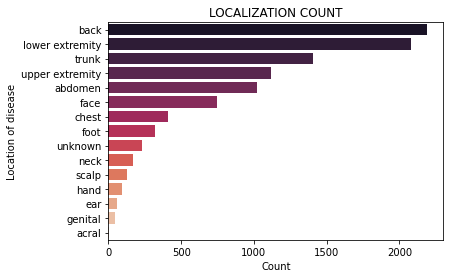

In [ ]:
ax=sns.countplot(data=skin_df, y='localization', order=skin_df.localization.value_counts().index, palette = "rocket")
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title('LOCALIZATION COUNT')
plt.ylabel('Location of disease')
plt.xlabel('Count')
plt.show()

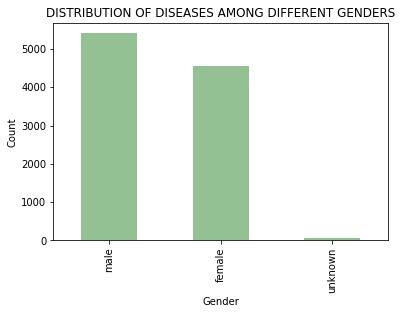

In [ ]:
skin_df['sex'].value_counts().plot(kind='bar', color = (0.3, 0.6, 0.3, 0.6))
plt.title('DISTRIBUTION OF DISEASES AMONG DIFFERENT GENDERS')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

3. This graph shows us the different age groups which have been affected by the skin diseases

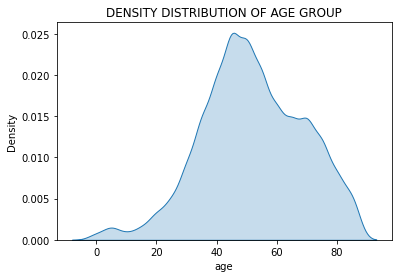

In [ ]:
sns.kdeplot(skin_df['age'], shade = True)
plt.title('DENSITY DISTRIBUTION OF AGE GROUP')
plt.show()

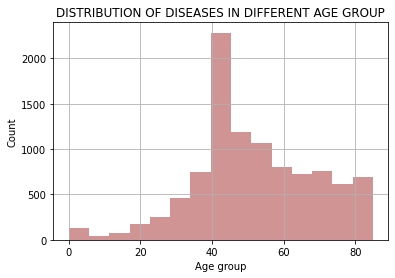

In [ ]:
skin_df['age'].hist(bins=15, color = (0.7, 0.3, 0.3, 0.6))
plt.title('DISTRIBUTION OF DISEASES IN DIFFERENT AGE GROUP')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.show()

4. Information on the different genders who have been affected by the disases

5. This scatterplot gives us the distribution of the cell types among the various age groups

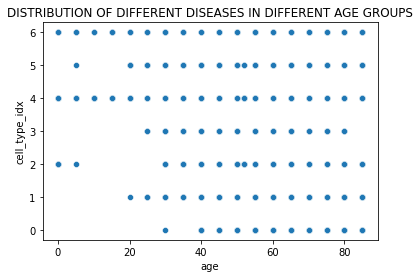

In [ ]:
#Visualization of different diseases among different age groups
sns.scatterplot(x=skin_df['age'], y = skin_df['cell_type_idx'], palette = 'icefire')
plt.title('DISTRIBUTION OF DIFFERENT DISEASES IN DIFFERENT AGE GROUPS')
plt.show()

6. This graph tells us where the diseases are located

7. The following plot gives us the count of cells of every disease in different parts of the body.

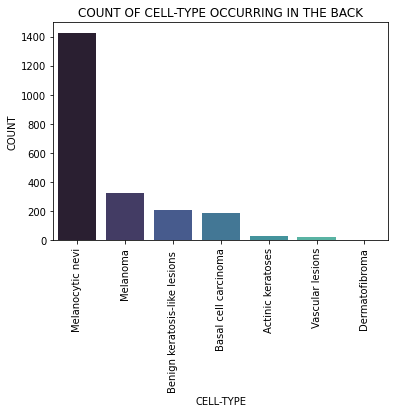

In [ ]:
local = skin_df[skin_df['localization']=='back']
ax=sns.countplot(data=local, x='cell_type', order = local.cell_type.value_counts().index, palette = "mako")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title('COUNT OF CELL-TYPE OCCURRING IN THE BACK')
plt.xlabel('CELL-TYPE')
plt.ylabel('COUNT')
plt.show()


In [ ]:
# #diseases occuring in back portion of the body
# local_df = skin_df[skin_df['localization']=='back']
# local_df['cell_type'].value_counts().plot(kind='bar',color = (0.5, 0.9, 0.7, 0.6))
# local_df.head()
# plt.show()

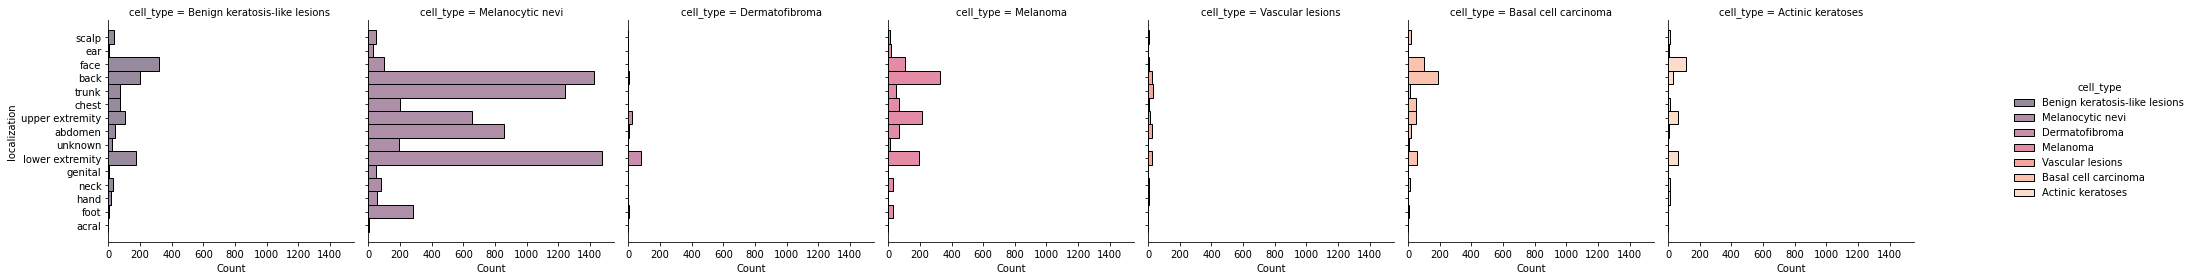

In [ ]:
ax = sns.displot(
    skin_df, y="localization", col="cell_type",
    height=4, binwidth = 1, facet_kws=dict(margin_titles=True), hue = 'cell_type',palette = 'rocket' )
#plt.xticks(rotation=90)
plt.show()

8. Distribution of different diseases across different genders

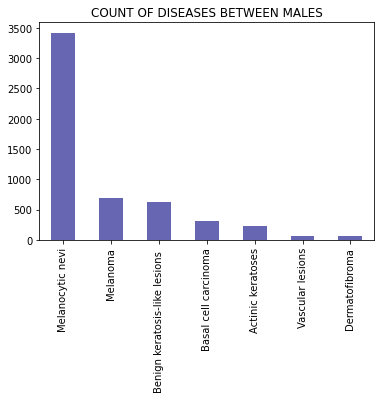

In [ ]:
#distribution of diseases b/w males

male_df = skin_df[skin_df['sex']=='male']
male_df['cell_type'].value_counts().plot(kind='bar',color = (0.0, 0.0, 0.5, 0.6))
plt.title('COUNT OF DISEASES BETWEEN MALES')
plt.show()

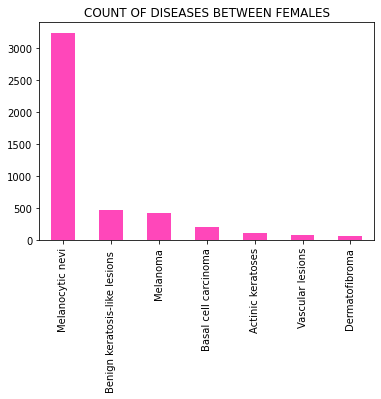

In [ ]:
#distribution of diseases b/w females

female_df = skin_df[skin_df['sex']=='female']
female_df['cell_type'].value_counts().plot(kind='bar',color = (1, 0.2, 0.7, 0.9))
plt.title('COUNT OF DISEASES BETWEEN FEMALES')
plt.show()


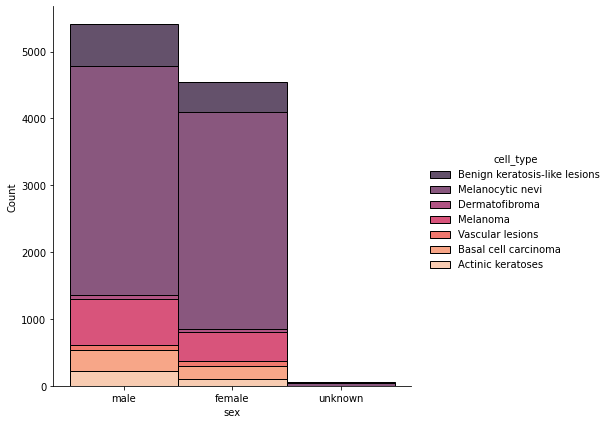

In [ ]:
ax = sns.displot(
    skin_df, x="sex",
    binwidth=10, height=6, multiple="stack", hue = 'cell_type',palette = 'rocket' 
)
plt.show()

9. How different types of diseases are treated

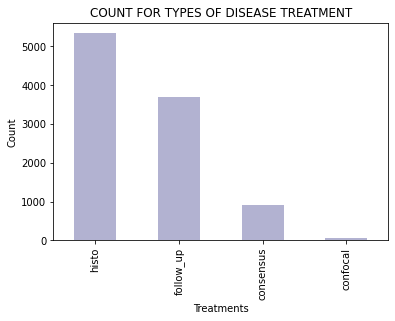

In [ ]:
#diagnosis type count

skin_df['dx_type'].value_counts().plot(kind='bar',color = (0.5, 0.5, 0.7, 0.6))
plt.title('COUNT FOR TYPES OF DISEASE TREATMENT')
plt.xlabel('Treatments')
plt.ylabel('Count')
plt.show()

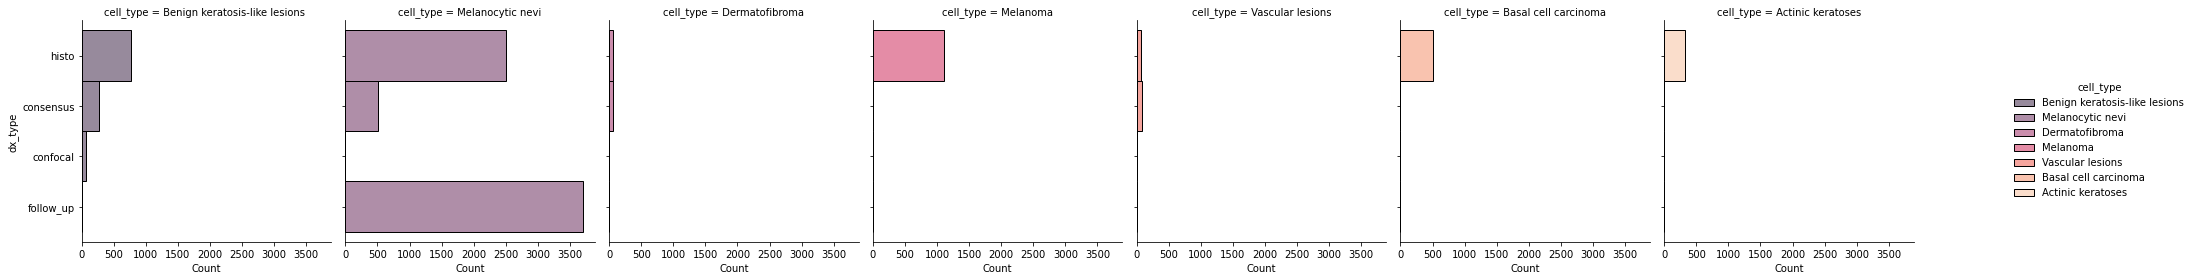

In [ ]:
ax = sns.displot(
    skin_df, y="dx_type", col="cell_type",
    binwidth=10, height=4, facet_kws=dict(margin_titles=True), hue = 'cell_type',palette = 'rocket'
)
plt.show()

In [ ]:
# this will tell us how many images are associated with each lesion_id
df_undup = skin_df.groupby('lesion_id').count()

# now we filter out lesion_id's that have only one image associated with it
df_undup = df_undup[df_undup['image_id'] == 1]
df_undup.reset_index(inplace=True)
df_undup.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,Path,cell_type,cell_type_idx
0,HAM_0000001,1,1,1,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1,1,1,1


In [ ]:
# here we identify lesion_id's that have duplicate images and those that have only one image.
def get_duplicates(x):
    unique_list = list(df_undup['lesion_id'])
    if x in unique_list:
        return 'unduplicated'
    else:
        return 'duplicated'

# create a new colum that is a copy of the lesion_id column
skin_df['duplicates'] = skin_df['lesion_id']
# apply the function to this new column
skin_df['duplicates'] = skin_df['duplicates'].apply(get_duplicates)
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,Path,cell_type,cell_type_idx,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/HAM10000_images_part_1/...,Benign keratosis-like lesions,2,duplicated
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/HAM10000_images_part_1/...,Benign keratosis-like lesions,2,duplicated
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/HAM10000_images_part_1/...,Benign keratosis-like lesions,2,duplicated
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/HAM10000_images_part_1/...,Benign keratosis-like lesions,2,duplicated
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/drive/MyDrive/HAM10000_images_part_2/...,Benign keratosis-like lesions,2,duplicated


In [ ]:
skin_df['duplicates'].value_counts()

unduplicated    5514
duplicated      4501
Name: duplicates, dtype: int64

In [ ]:
#skin_df['image'] = skin_df['Path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [ ]:
# skin_df.head()

In [ ]:
#plt.imshow(skin_df['image'][21])

In [ ]:
# n_samples = 5
# fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
# for n_axs, (type_name, type_rows) in zip(m_axs, 
#                                          skin_df.sort_values(['cell_type']).groupby('cell_type')):
#     n_axs[0].set_title(type_name)
#     for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
#         c_ax.imshow(c_row['image'])
#         c_ax.axis('off')
# fig.savefig('category_samples.png', dpi =300)

### **Pixel distribution**

In [ ]:
pix_data = pd.read_csv('/content/drive/MyDrive/hmnist_28_28_RGB.csv')
pix_data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [ ]:
%load_ext tensorboard
import os
import datetime


def create_tensorboaord_callback():
  logdir = os.path.join("/content/drive/MyDrive/dataverse_files/Log_DIR",
                        datetime.datetime.now().strftime("%d%m%Y-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
tensorboard = create_tensorboaord_callback()

## **TRAIN TEST SPLIT**

In [ ]:
#var name changed -> 2

X = pix_data.drop(columns=['label'],axis=1)
y = pix_data['label']

In [ ]:
y

0        2
1        2
2        2
3        2
4        2
        ..
10010    0
10011    0
10012    0
10013    0
10014    6
Name: label, Length: 10015, dtype: int64

In [ ]:
X

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,181,208,185,187,208,186,186,206,187,189
10011,2,3,1,38,33,32,121,104,103,132,...,129,96,79,76,24,23,21,3,4,1
10012,132,118,118,167,149,149,175,156,160,184,...,190,204,181,178,181,159,153,172,151,145
10013,160,124,146,164,131,152,167,127,146,169,...,165,185,162,167,184,157,166,185,162,172


### **Oversampling**
To overcome class imbalace

In [ ]:
oversample = RandomOverSampler()
X,y  = oversample.fit_resample(X,y)

In [ ]:
print(X)

       pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            192        153        193        195        155        192   
1             25         14         30         68         48         75   
2            192        138        153        200        145        163   
3             38         19         30         95         59         72   
4            158        113        139        194        144        174   
...          ...        ...        ...        ...        ...        ...   
46930        100         73         86        105         76         88   
46931        151        116        154        157        125        163   
46932        122        102        109        135        115        122   
46933        217        171        181        208        153        156   
46934        122        102        109        135        115        122   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2342  pixel2343  \
0            197   

In [ ]:
X = np.array(X).reshape(-1,28,28,3)
print('Shape of X :',X.shape)

Shape of X : (46935, 28, 28, 3)


In [ ]:
X

array([[[[192, 153, 193],
         [195, 155, 192],
         [197, 154, 185],
         ...,
         [193, 144, 153],
         [197, 154, 163],
         [194, 152, 160]],

        [[197, 162, 202],
         [201, 160, 197],
         [202, 160, 193],
         ...,
         [194, 147, 149],
         [198, 158, 166],
         [192, 153, 167]],

        [[197, 155, 193],
         [198, 154, 185],
         [202, 156, 191],
         ...,
         [194, 149, 152],
         [199, 161, 177],
         [194, 156, 175]],

        ...,

        [[194, 157, 191],
         [206, 173, 206],
         [206, 165, 192],
         ...,
         [191, 155, 183],
         [193, 159, 187],
         [193, 163, 197]],

        [[187, 154, 185],
         [203, 171, 199],
         [202, 161, 183],
         ...,
         [178, 131, 148],
         [187, 152, 174],
         [190, 159, 189]],

        [[171, 136, 164],
         [191, 153, 179],
         [196, 155, 176],
         ...,
         [173, 124, 138],
        

In [ ]:
X = (X-np.mean(X))/np.std(X)

In [ ]:
#var name changed -> 4

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [ ]:
# X_train

In [ ]:
X_test

array([[[[ 0.58140711, -0.31125   ,  0.02651215],
         [ 0.84679166,  0.02651215,  0.48490364],
         [ 0.87091753,  0.00238628,  0.50902951],
         ...,
         [ 0.84679166, -0.14236892,  0.14714149],
         [ 0.79853992, -0.09411719,  0.2195191 ],
         [ 0.75028819, -0.16649479,  0.2195191 ]],

        [[ 0.62965885, -0.3836276 ,  0.00238628],
         [ 0.82266579, -0.09411719,  0.41252604],
         [ 0.87091753, -0.06999132,  0.43665191],
         ...,
         [ 0.8950434 , -0.19062066,  0.12301562],
         [ 0.84679166, -0.14236892,  0.26777083],
         [ 0.77441406, -0.16649479,  0.26777083]],

        [[ 0.75028819, -0.33537586,  0.12301562],
         [ 0.79853992, -0.21474653,  0.3642743 ],
         [ 0.87091753, -0.06999132,  0.3642743 ],
         ...,
         [ 0.87091753, -0.16649479,  0.12301562],
         [ 0.8950434 , -0.09411719,  0.26777083],
         [ 0.79853992, -0.14236892,  0.26777083]],

        ...,

        [[-0.14236892, -0.96264843, -0

In [ ]:
Y_train

18033    1
38412    5
26590    2
6910     4
37704    5
        ..
43723    6
32511    3
5192     4
12172    0
33003    3
Name: label, Length: 37548, dtype: int64

In [ ]:
Y_test.head()

38662    5
18596    1
3768     4
11499    0
37161    5
Name: label, dtype: int64

In [ ]:
input_shape = (28,28,3)
num_classes = 7

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size = (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, kernel_size = (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), padding = 'same'))
#model.add(Dropout(0.40))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [ ]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience = 3,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.00001)

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Model_Minor/model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 30,
                    callbacks=[learning_rate_reduction])

Epoch 1/30
235/235 [==============================] - 16s 19ms/step - loss: 1.2326 - accuracy: 0.5213 - val_loss: 0.8951 - val_accuracy: 0.6602 - lr: 0.0010
Epoch 2/30
235/235 [==============================] - 4s 16ms/step - loss: 0.7216 - accuracy: 0.7337 - val_loss: 0.5479 - val_accuracy: 0.7989 - lr: 0.0010
Epoch 3/30
235/235 [==============================] - 4s 17ms/step - loss: 0.4550 - accuracy: 0.8343 - val_loss: 0.3904 - val_accuracy: 0.8554 - lr: 0.0010
Epoch 4/30
235/235 [==============================] - 4s 17ms/step - loss: 0.2994 - accuracy: 0.8918 - val_loss: 0.3223 - val_accuracy: 0.8860 - lr: 0.0010
Epoch 5/30
235/235 [==============================] - 4s 16ms/step - loss: 0.2266 - accuracy: 0.9189 - val_loss: 0.2413 - val_accuracy: 0.9145 - lr: 0.0010
Epoch 6/30
235/235 [==============================] - 4s 16ms/step - loss: 0.1750 - accuracy: 0.9394 - val_loss: 0.2312 - val_accuracy: 0.9224 - lr: 0.0010
Epoch 7/30
235/235 [==============================] - 4s 16ms/s

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Validation: Accuracy = %f  ;  Loss_v = %f" % (accuracy*100, loss*100))

Validation: Accuracy = 97.475231  ;  Loss_v = 17.032418


In [ ]:
predictions=model.predict(X_test) 
y_pred=np.argmax(predictions,axis=1)

In [ ]:
from sklearn.metrics import classification_report
cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

# Generate a classification report
report = classification_report(Y_test, y_pred, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

       akiec       1.00      1.00      1.00      1359
         bcc       0.98      1.00      0.99      1318
         bkl       0.94      0.98      0.96      1262
          df       1.00      1.00      1.00      1351
         mel       0.99      0.85      0.91      1374
          nv       1.00      1.00      1.00      1358
        vasc       0.92      0.99      0.95      1365

    accuracy                           0.97      9387
   macro avg       0.98      0.98      0.97      9387
weighted avg       0.98      0.97      0.97      9387



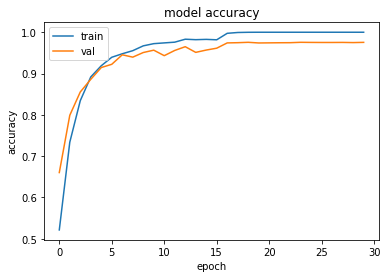

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

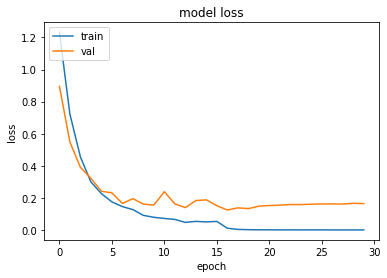

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Model_minor_2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model_minor_2/assets
